# Chapter 2.6

Dang Thanh Vu - ID: 197796

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

def plot_decision(X_train, X, model):
    h = .05  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.plot(X[0][:,0], X[0][:,1], 'bo')
    plt.plot(X[1][:,0], X[1][:,1], 'r+')
    plt.show()

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, d):
    return (1 + np.dot(x, y)) ** d

def gaussian_kernel(x, y, sigma):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

def kernel(x1, x2, t='linear', d=3, sigma=0.5):
    if(t=='linear'):
        return linear_kernel(x1, x2)
    if(t=='rbf'):
        return gaussian_kernel(x1,x2,sigma)
    if(t=='poly'):
        return polynomial_kernel(x1,x2,d)
    
class KernelPerceptron(object):

    def __init__(self, kernel='linear', T=1, d=3, sigma=5):
        self.T = T
        self.d = d
        self.sigma = sigma
        self.k = kernel
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = kernel(X[i], X[j], self.k, self.d, self.sigma)

        for t in range(self.T):
            for i in range(n_samples):
                if np.sign(np.sum(K[:,i] * self.alpha * y)) != y[i]:
                    self.alpha[i] += 1.0
        # Support vectors
        sv = self.alpha > 1e-5
        ind = np.arange(len(self.alpha))[sv]
        self.alpha = self.alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
    def project(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                s += a * sv_y * kernel(X[i], sv, self.k, self.d, self.sigma)
            y_predict[i] = s
        return y_predict

    def predict(self, X):
        X = np.atleast_2d(X)
        n_samples, n_features = X.shape
        return np.sign(self.project(X))

# Exercise 2.6.1

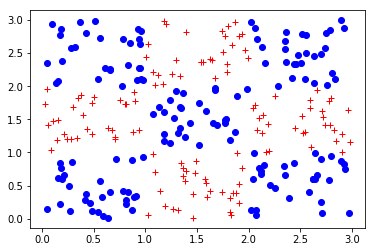

In [2]:
N = 30
X = np.zeros((3,3,N,2))
Y = np.zeros((3,3,N))
k = 3
for i in range(k):
    for j in range(k):
        X[i,j,:] = np.random.uniform([i, j], [i + 1, j + 1], size=(N, 2))
        if((i+j) % 2 == 0):
            Y[i,j,:] = np.ones(N)
        else:
            Y[i,j,:] = -1*np.ones(N)
X_train = X.reshape(k*k*N, 2)
Y_train = Y.reshape(k*k*N)
X1 = X_train[np.where(Y_train == 1)]
X2 = X_train[np.where(Y_train == -1)]

plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

X = np.zeros((3,3,N,2))
Y = np.zeros((3,3,N))
for i in range(k):
    for j in range(k):
        X[i,j,:] = np.random.uniform([i, j], [i + 1, j + 1], size=(N, 2))
        if((i+j) % 2 == 0):
            Y[i,j,:] = np.ones(N)
        else:
            Y[i,j,:] = -1*np.ones(N)
X_test = X.reshape(k*k*N, 2)
Y_test = Y.reshape(k*k*N)

testing acc:  0.5555555555555556


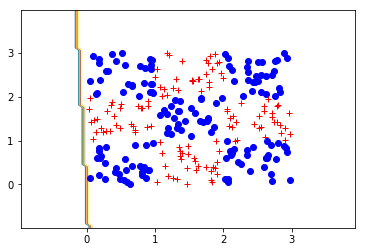

In [3]:
model1 = KernelPerceptron(kernel='linear', T = 500)
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model1)

testing acc:  0.937037037037037


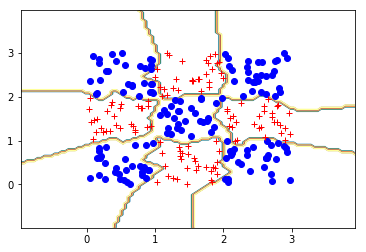

In [4]:
model2 = KernelPerceptron(kernel='rbf', sigma=0.1, T = 500)
model2.fit(X_train, Y_train)
Y_predict = model2.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model2)

testing acc:  0.9629629629629629


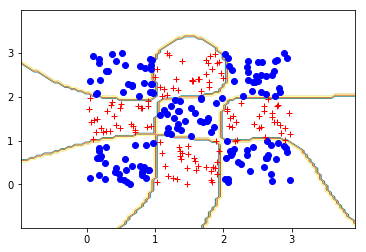

In [5]:
model3 = KernelPerceptron(kernel='rbf', sigma=0.5, T = 500)
model3.fit(X_train, Y_train)
Y_predict = model3.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model3)

testing acc:  0.9074074074074074


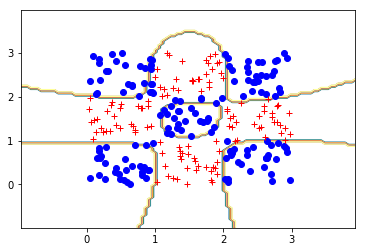

In [6]:
model4 = KernelPerceptron(kernel='rbf', sigma=1, T = 500)
model4.fit(X_train, Y_train)
Y_predict = model4.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model4)

testing acc:  0.7666666666666667


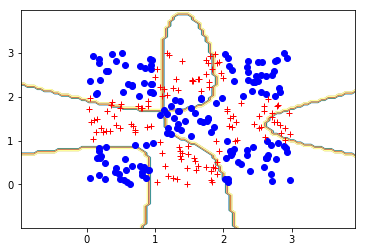

In [7]:
model5 = KernelPerceptron(kernel='rbf', sigma=1.5, T = 500)
model5.fit(X_train, Y_train)
Y_predict = model5.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model5)

testing acc:  0.6370370370370371


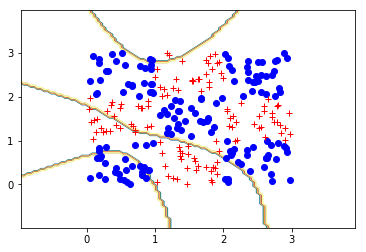

In [8]:
model6 = KernelPerceptron(kernel='rbf', sigma=2.5, T = 500)
model6.fit(X_train, Y_train)
Y_predict = model6.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model6)

testing acc:  0.5703703703703704


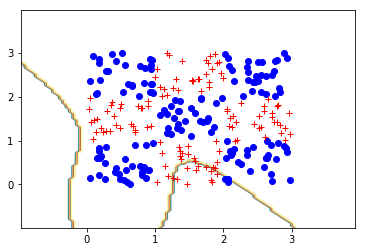

In [9]:
model7 = KernelPerceptron(kernel='poly', d=3, T = 500)
model7.fit(X_train, Y_train)
Y_predict = model7.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model7)

testing acc:  0.6888888888888889


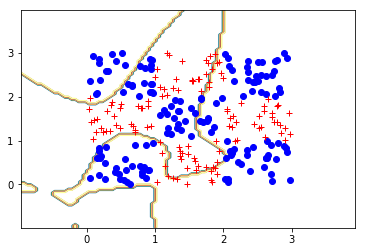

In [10]:
model8 = KernelPerceptron(kernel='poly', d=5, T = 500)
model8.fit(X_train, Y_train)
Y_predict = model8.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model8)

testing acc:  0.6333333333333333


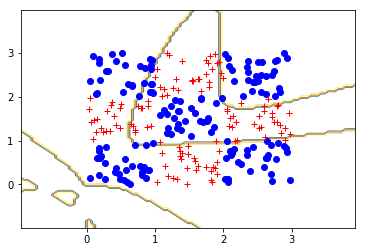

In [11]:
model9 = KernelPerceptron(kernel='poly', d=15, T = 500)
model9.fit(X_train, Y_train)
Y_predict = model9.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model9)

testing acc:  0.6703703703703704


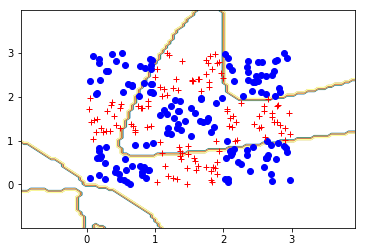

In [12]:
model10 = KernelPerceptron(kernel='poly', d=18, T = 500)
model10.fit(X_train, Y_train)
Y_predict = model10.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model10)

testing acc:  0.6666666666666666


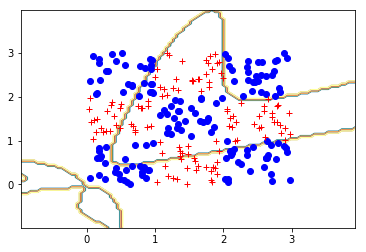

In [13]:
model11 = KernelPerceptron(kernel='poly', d=20, T = 500)
model11.fit(X_train, Y_train)
Y_predict = model11.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model11)

testing acc:  0.6851851851851852


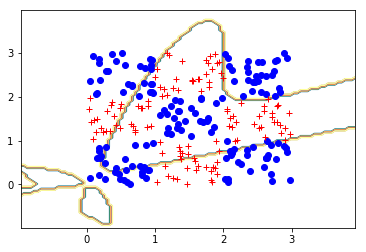

In [14]:
model12 = KernelPerceptron(kernel='poly', d=22, T = 500)
model12.fit(X_train, Y_train)
Y_predict = model12.predict(X_test)
print("testing acc: ",np.sum(Y_predict==Y_test)/(9*N))
plot_decision(X_train, [X1, X2], model12)